# Principal Component Analysis
### Principal Component Analysis (PCA) is an unsupervised learning technique that reduces the dimensionality of data by transforming it into a new set of uncorrelated variables, called principal components, which capture the maximum variance. It excels in simplifying mall customer data (e.g., reducing annual income, spending score, and age into two components) for visualization or preprocessing, requiring no labeled data beyond the feature matrix. The algorithm assumes that the data is centered and that principal components are linear combinations of the original features, which simplifies computation but may not hold for highly non-linear relationships. Its strength lies in its ability to retain most of the data's variance with fewer dimensions, but it can be sensitive to the scale of features and assumes linearity.

### Use PCA as a preprocessing step for your unsupervised learning prototypes, with variance analysis to determine the number of components, particularly for deployment in data visualization or clustering tasks.

| Aspect | Details |
| :- | :- |
| Use For           | Dimensionality reduction (e.g., customer data preprocessing, image compression)<br>Can be extended to data visualization or noise filtering |
| Key Assumptions   | - Data is centered (zero mean)<br>- Linear relationships among features<br>- Sufficient variance for component extraction |
| Advantages        | - Reduces dimensionality while preserving variance<br>- Improves computational efficiency<br>- Facilitates data visualization |
| Disadvantages     | - Sensitive to feature scaling<br>- Assumes linearity, limiting non-linear data<br>- Loses some interpretability of original features |
| Avoid When        | - Datasets with strong non-linear patterns<br>- Very small datasets with limited variance<br>- Need for preserving all original features |
| Real-World Use Case | Mall customer segmentation (e.g., reducing features for clustering by income and spending)<br>Face recognition (e.g., compressing pixel data for identification) |

## Problem Description: 
### Reduce the dimensionality of mall customer data (e.g., annual income, spending score, age) to two principal components for visualization and improved clustering, enhancing interpretability while preserving variance. This is an unsupervised learning technique to preprocess data for segmentation.

Using Kaggle dataset https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [13]:
project_dir = './12_pca_principal_component_analysis'

# load  dataset
data = pd.read_csv(project_dir + '/data/Mall_Customers.csv')
print("Dataset loaded, shape:", data.shape)

# select relevant features
features = ['Annual Income (k$)', 'Spending Score (1-100)']

X = data[features]
print("Features shape:", X.shape)

# scale features for better K-Means performance (needed because of distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset loaded, shape: (200, 5)
Features shape: (200, 2)


In [14]:
# apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio by Component: {explained_variance_ratio}')
print(f'Total Explained Variance: {sum(explained_variance_ratio):.2f}')

Explained Variance Ratio by Component: [0.50495142 0.49504858]
Total Explained Variance: 1.00


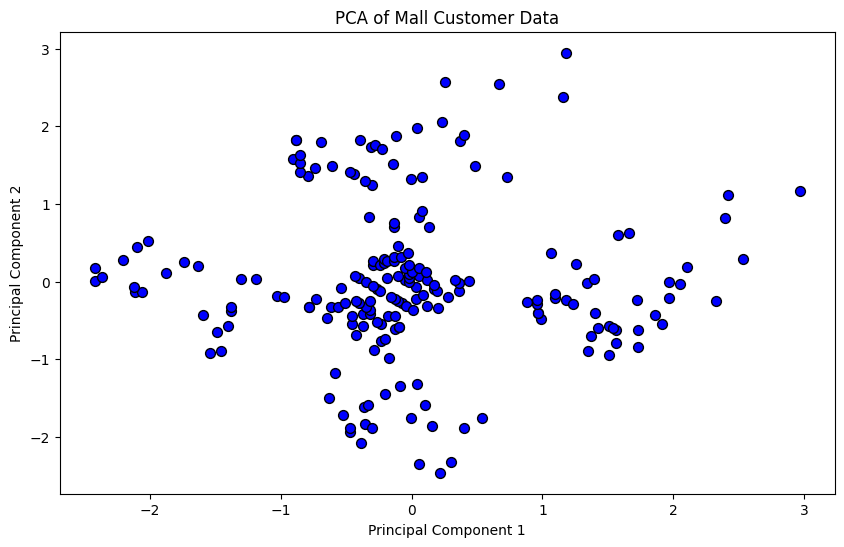

In [16]:
# visualize the transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mall Customer Data')
plt.show()

In [17]:
# save the PCA model and scaler in a 'model' subdirectory
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True)
pca_filename = os.path.join(model_dir, 'mall_customer_pca_model.pkl')
scaler_filename = os.path.join(model_dir, 'mall_customer_scaler.pkl')
joblib.dump(pca, pca_filename)
joblib.dump(scaler, scaler_filename)
print(f'PCA model saved as {pca_filename}')
print(f'Scaler saved as {scaler_filename}')

PCA model saved as ./12_pca_principal_component_analysis/model/mall_customer_pca_model.pkl
Scaler saved as ./12_pca_principal_component_analysis/model/mall_customer_scaler.pkl


In [18]:
# load the PCA model and scaler, and run a transformation test
loaded_pca = joblib.load(pca_filename)
loaded_scaler = joblib.load(scaler_filename)
sample_data = pd.DataFrame(
    [[60, 40]],  # example values for annual income and spending score
    columns=features
)
sample_input_scaled = loaded_scaler.transform(sample_data)
sample_pca = loaded_pca.transform(sample_input_scaled)
print(f'Transformed PCA coordinates for sample input: {sample_pca[0]}')

Transformed PCA coordinates for sample input: [-0.29511441  0.26488576]
